# Introductory applied machine learning
# Assignment 4: Unsupervised Learning Part A (KMeans Clustering) [50%]

<div align="right"><font color="blue" size="5">Your Score was 59.5 out of a total of 66.0, or 90.2%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 4 and deals with the News-Group Dataset - Part B deals with the MNIST dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 22/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.
   
1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A (this notebook) and Part B are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
from utils.plotter import plot_voronoi
from random import sample

Populating the interactive namespace from numpy and matplotlib


/afs/inf.ed.ac.uk/user/s16/s1608480/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/afs/inf.ed.ac.uk/user/s16/s1608480/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the dataset

In this part of the assignment we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

### Description of the Data

This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) for each word instead of the frequency counts (which is why we will be downloading it anew). These weights represent the importance of a word to a document with respect to a collection of documents. The importance increases proportionally to the number of times a word appears in the document and decreases proportionally to the number of times the word appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that appear in more than two documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words). We have provided the code for this preprocessing for you.

## 1. Exploration of the dataset

Instead of providing the data as a dataset, we are going to import the data from the sklearn library. Make sure you have an active internet connection and run the cell below to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.19/datasets/index.html#the-20-newsgroups-text-dataset)).

**Do not change any of the code in this cell.**

*This may take a wee while as it needs to download the dataset and preprocess it.*

In [2]:
# Load the Data with only the required categories
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'), data_home='./datasets')
# Transform Data to TF-IDF and store in X/y
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X = pd.DataFrame(vectorizer.fit_transform(newsgroups_train.data).todense(), 
                 columns=vectorizer.get_feature_names())
y = pd.Series(np.array(cats)[newsgroups_train.target])

### ========== Question 1.1 --- [10 marks] ==========

As usual we start with an initial inspection of the data. 

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the data (variables `X` and `y`). This should be no more than a few lines of code.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). Be sure to indicate what `X` and `y` are (data type and purpose). (<5 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature? (1 or 2 sentences)

<div align="right"><font color="blue" size="4">8.0/10.0</font></div>

In [3]:
# Let's first look at the first few instances of X and y
display(X.head())
display(y.head())

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0          rec.sport.baseball
1          rec.sport.baseball
2            rec.sport.hockey
3    comp.sys.ibm.pc.hardware
4          rec.sport.baseball
dtype: object

In [6]:
# Now let's look at the number of instances and attributes of X
# Let's first look at the total number of instances and attributes
print('Number of instances: {}, number of attributes: {}'.format(X.shape[0], X.shape[1]))
# Intuition suggests y is the set of class labels. As a sanity check let's look at its shape
print('Shape of y: {}'.format(y.shape))

Number of instances: 2845, number of attributes: 1000
Shape of y: (2845,)


In [7]:
# I want to see some information about my datafram
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Columns: 1000 entries, abc to zone
dtypes: float64(1000)
memory usage: 21.7 MB


In [5]:
# Now some useful summary statistics
display(X.describe())
display(y.describe())

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,...,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,0.002436,0.002149,0.006709,0.001454,0.002286,0.003953,0.003115,0.000921,0.008366,0.001816,...,0.002612,0.006811,0.002470,0.003564,0.016934,0.008797,0.006381,0.002772,0.003288,0.001626
std,0.030224,0.020739,0.034631,0.023100,0.021634,0.030111,0.026958,0.016275,0.043921,0.026026,...,0.026988,0.039172,0.032786,0.031238,0.061181,0.039346,0.037319,0.025381,0.030929,0.022175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.723914,0.420916,0.431380,0.519765,0.443354,0.663808,0.572124,0.413233,1.000000,0.578282,...,0.723081,0.568146,0.878185,0.693531,0.650649,0.455493,0.646447,0.572455,0.703771,0.605576


count                 2845
unique                   5
top       rec.sport.hockey
freq                   600
dtype: object

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Lacking a print out or plot that shows the distribution of the clusters.</font></div>

b) 

We see that X is a dataframe storing 2845 documents. Each document is given in terms of 1000 features, those being the tf-idf weights of certains words as per the description given earlier (all stored as floats). We see that y stores the class labels for each of these documents (one of the five types of document).

We immediately see that the features are very sparse i.e. a lot of features take the value 0. We will need to keep this in mind when considering how to traverse our data. The means vary widely across features, from 0.0009 to 0.01, an entire order of magnitude greater. This can cause problems further down the line and we may want to normalise our data. The standard deviations across features also differ across a similarly wide range.

We also see that we have many outliers in the data as the max values for each feature tend to be much larger than the means.

<div align="right"><font color="blue" size="4">4.0</font></div>

<div align="left"><font color="green" size="4">Did not comment on other attribute of the data: e.g. that the range is 0 to 1.0, or the most frequent class rec.sport.hockey.</font></div>

c)

The fundamental difference between the TF-IDF and just the TF is of course the factor of the inverse document frequency. This measures how important a term is by considering the fact that some terms e.g. 'is' 'of' may appear many times even though they have little importance. By weighing these words down we in turn scale up the rarer ones which are more important. Calculating the TF on its own does not do this.

<div align="right"><font color="blue" size="4">2.0</font></div>

## 2. Unsupervised Learning

### ========== Question 2.1 --- [6 marks] ==========

We will now use [K-Means](http://scikit-learn.org/0.19/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering as a means of unsupervised learning of the document classes. Familiarise yourself with the implementation and then answer the following questions.

&nbsp;&nbsp;**(a)** [Text] The KMeans algorithm is non-deterministic. Explain what is meant by this, why this is the case, and how the final model is selected (3 sentences).<br>
&nbsp;&nbsp;**(b)** [Text] One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why? *Hint: Look at the `y` values, which are in a Pandas `Series`*.<br>
&nbsp;&nbsp;**(b)** [Code] Create and fit a K-Means model to the training data `X` with your specified number of clusters. For reproducability, set `random_state=1000` -- keep other arguments at default values. Keep track of the k-means object created.

<div align="right"><font color="blue" size="4">6.0/6.0</font></div>

a)

A deterministic algorithm will be robus with respect to inputs. The K-means algorithm is non-deterministic in the sense that given the same input, it will converge at different solutions when run multiple times. This the algorithm initially chooses a random state to start in and will converge to a local minimum of the solution space.

We usually select a final model by running the algorithm several times on the same data set (obtaining multiple solutions) and choosing the solution with the smallest aggregate intra-cluster distance.

<div align="right"><font color="blue" size="4">3.0</font></div>

b)

We know from looking at the y values that we have data in 5 different classes (document types). It would be reasonable to then choose 5 clusters.

(It should also be noted that we observed earlier that two separate pairs of classes were quite similar. A clustering algorithm may struggle to discern the classes in each pair and might converge quicker if we only choose 3 clusters.)

<div align="right"><font color="blue" size="4">2.0</font></div>

In [8]:
km = KMeans(n_clusters=5, random_state=1000)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1000, tol=0.0001, verbose=0)

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.2 --- [6 marks] ==========

<div align="right"><font color="blue" size="4">5.0/6.0</font></div>

We will now evaluate the quality of this fit, primarily through the Adjusted Rand Index (ARI) of the model.

&nbsp;&nbsp;**(a)** [Text] By referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what the ARI (`adjusted_rand_score`) measures about the quality of the fit. What is a disadvantage of this measure for evaluating clustering performance? (2-3 sentences) <br>
&nbsp;&nbsp;**(b)** [Code] Compute (and display) the Adjusted Rand Index of the fitted model.<br>
&nbsp;&nbsp;**(c)** [Text] Comment (1 or 2 sentences) on the quality of the fit as expressed by this measure.<br>

a)

The ARI (adjusted-rand-index) is a similarity measure between two clusterings (the true and predicted class labels). It considers all pairs of samples and counts those that are assigned to the same or different classes - it also normalises. Therefore it is close to zero for independent clusters and exactly one for identical clusters.

One disadvantage of this is that it uses a strong assumption of a generalised hypergeometric distribution for the expected value of the rand-index (the ARI itself is the difference between the rand-index and this expected value). Another is that it can only be used when you have the actual class labels of your testing data.

<div align="right"><font color="blue" size="4">3.0</font></div>

In [9]:
print("ARI: {:5f}".format(adjusted_rand_score(y, km.labels_)))

ARI: 0.226193


<div align="right"><font color="blue" size="4">1.0</font></div>

c)

Bearing in mind that identical clusterings have an ARI of 1, our value is very low. In fact, since there are 5 different classes, if we classified instances randomly we would expect an accuracy of 0.2 which is almost the same as our ARI, indicating poor performance. This means that actual classes are spread relatively evenly across all clusters. We also remember that there were two different pairs of classes which intuitively sounded similar; our classifier may be struggling to discern these.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Did not correctly describe on ARI range in comparison with the ARI value obtained</font></div>

### ========== Question 2.3 --- [12 marks] ==========
<a id='question_2_3'></a>
Let us explore the quality of the fit further. We will visualise bar-charts of the fit.

&nbsp;&nbsp;**(a)** [Code] Create a bar-chart of the number of data-points with a particular class assigned to each cluster centre. You should be able to do this in one plot using seaborn functionality. Make sure to distinguish the cluster-centres (using for example grid-lines), and label the plot appropriately. As part of the cluster labels, include the total number of data-points assigned to that cluster. *Hint: it might be useful to specify the image width using `pylab.rcParams['figure.figsize'] = (width, height)` to make things clearer.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment (3 to 4 sentences) on the distribution of datapoints to cluster centres, and how this relates to the ARI measure above.


<div align="right"><font color="blue" size="4">12.0/12.0</font></div>

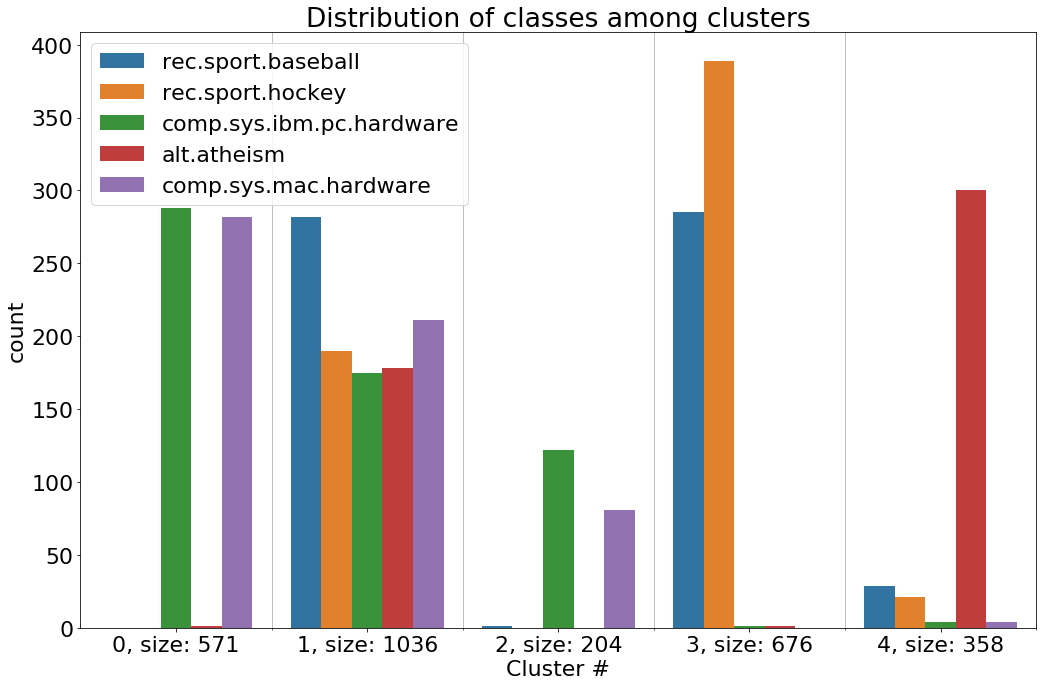

In [10]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
sns.countplot(km.labels_, hue=y)
plt.xlabel('Cluster #')
plt.title('Distribution of classes among clusters')

plt.gca().set_xticks([i + 0.5 for i in range(5)], minor=True)
xticklabels = []
for i in range (0,5):
    xticklabels.append("{}, size: {}".format(i, np.bincount(km.labels_)[i]))
plt.gca().set_xticklabels(xticklabels)
plt.grid(True, which='minor')

plt.tight_layout()
plt.show()

<div align="right"><font color="blue" size="4">6.0</font></div>

b)

Only one of our clusters is mainly comprised of one class: cluster 4 contains mostly alt.atheism. Cluster 2 contains hardly any elements and that too mainly only comp.sys.ibm.pc.hardware and comp.sys.mac hardware. We anticipated that the clustering algorithm would struggle to discern between these two classes and this is much more apparent in cluster 0 which has a huge number of both classes. We also anticipated a difficulty in discerning between rec.sport.baseball and rec.sport.hockey and this is evident when looking at cluster 3 which similarly has a large number of instances of both classes. Cluster 1 contains a good number from each class relatively equally. Clearly this is a poor fit and the classes are widely spread amongst all the clusters; this accounts for the low ARI score of 0.22.

<div align="right"><font color="blue" size="4">6.0</font></div>

### ========== Question 2.4 --- (LEVEL 11) --- [11 marks] ==========

Another way to quantify the quality of the fit is to use the Aggregate Intra-Cluster Distance (this is known as the `inertia` within SKLearn).

&nbsp;&nbsp;**(a)** [Text] Again by referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what this measure reports. Indicate why it may be less straightforward at judging the quality of the clustering than the ARI. (2 to 3 sentences). <br>
&nbsp;&nbsp;**(b)** [Code] Report the Inertia of the fitted model as well as the mean distance between each data-point and the global mean. Compute also a distance matrix such that the entry with index (i,j) shows the distance between centre i and centre j.<br>
&nbsp;&nbsp;**(c)** [Text] Using the above values, comment on what the Inertia score tells us about the quality of the fit, as well as anything else you can say about the clusters. (2 to 3 sentences)

(a) ***Your answer goes here:***

In [11]:
# (b) # Your Code goes here:

(c) ***Your answer goes here:***

### ========== Question 2.5 --- [16 marks] ==========

We will now investigate using [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) dimensionality reduction to try and improve the quality of the fit.

&nbsp;&nbsp;**(a)** [Text] Give one reason why PCA **might** be preferrable in certain cases in reducing dimensionality over just picking a subset of the features.<br>
&nbsp;&nbsp;**(b)** [Code] Pick 10 values in the range [1, ... 1000] inclusive, representing feature-space dimensionality `n`. Use a log-scale to span this range efficiently. For each of these values, reduce the dimensionality of `X` to the respective size (i.e. PCA with `n` components), and then fit a 5-centre KMeans classifier, storing the `adjusted_rand_score` for each dimensionality. *N.B: Set the `random_state=1000` for both PCA and K-Means objects to ensure reproducability.*<br>
&nbsp;&nbsp;**(c)** [Code] Plot the the `adjusted_rand_score` against the number of principal components. **Scale** the axes appropriately to visualise the results, and label the plot.<br>
&nbsp;&nbsp;**(d)** [Text] Comment on the effect dimensionality reduction had on the K-Means clustering and what could give rise to this (2 - 3 sentences).<br>
&nbsp;&nbsp;**(e)** [Code] Fit a 5-cluster K-Means object to the data with the dimensionality that produced the best ARI. In a similar manner to [Question 2.3](#question_2_3), plot a bar-chart of the number of data-points from each class assigned to each cluster. *N.B: Remember to set `random_state=1000` for both PCA and K-Means objects, and label all your diagrams*.<br>
&nbsp;&nbsp;**(f)** [Text] Compare the clustering distribution in **(e)** and in [Question 2.3 **(a)**](#question_2_3). *Hint: comment briefly (1 to 2 sentences) on the distribution of classes*.

<div align="right"><font color="blue" size="4">16.0/16.0</font></div>

a)

When picking a subset of features we try to choose those which have the greatest impact towards our classification. When carrying out PCA we make an assumption about the data and its distribution and then try to represent the data we have in a lower dimension. If our assumption about the data is correct, we will lose less information when carrying out PCA than we would by taking a subset of features.

<div align="right"><font color="blue" size="4">1.0</font></div>

In [12]:
n_range = np.logspace(0,3,10)
ARIs = []

for n in n_range:
    pca = PCA(n_components=int(n), random_state=1000)
    X_ = pca.fit_transform(X)
    km = KMeans(n_clusters=5, random_state=1000)
    km.fit(X_)
    ARIs.append(adjusted_rand_score(y, km.labels_))

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">Computed PCA multiple times (No points deducted)</font></div>

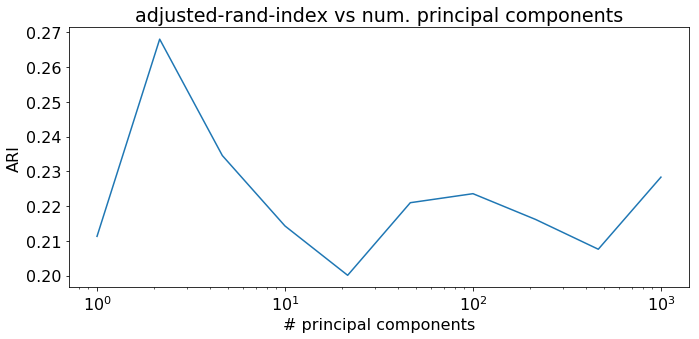

In [13]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 16})

plt.xscale('log')
plt.plot(n_range, ARIs)
plt.xlabel('# principal components')
plt.ylabel('ARI')
plt.title('adjusted-rand-index vs num. principal components')

plt.tight_layout()
plt.show()

<div align="right"><font color="blue" size="4">3.0</font></div>

d)

The graph indicates that as we increased the number of principal components to somewhere between 1-10 (it seems to be around 3-4) we improved the ARI from our clustering. 

This could have been because many of our features were multimodal which would result in sparse clusters. PCA tries to find the subspace which captures the largest possible variance of the data to remove the effect of these unhelpful features, resulting in a better clustering.

It should be noted the the increase in ARI at the peak of the graph is not hugely significant, we are still relatively close to zero however we have slightly improved our clustering from before.

<div align="right"><font color="blue" size="4">3.0</font></div>

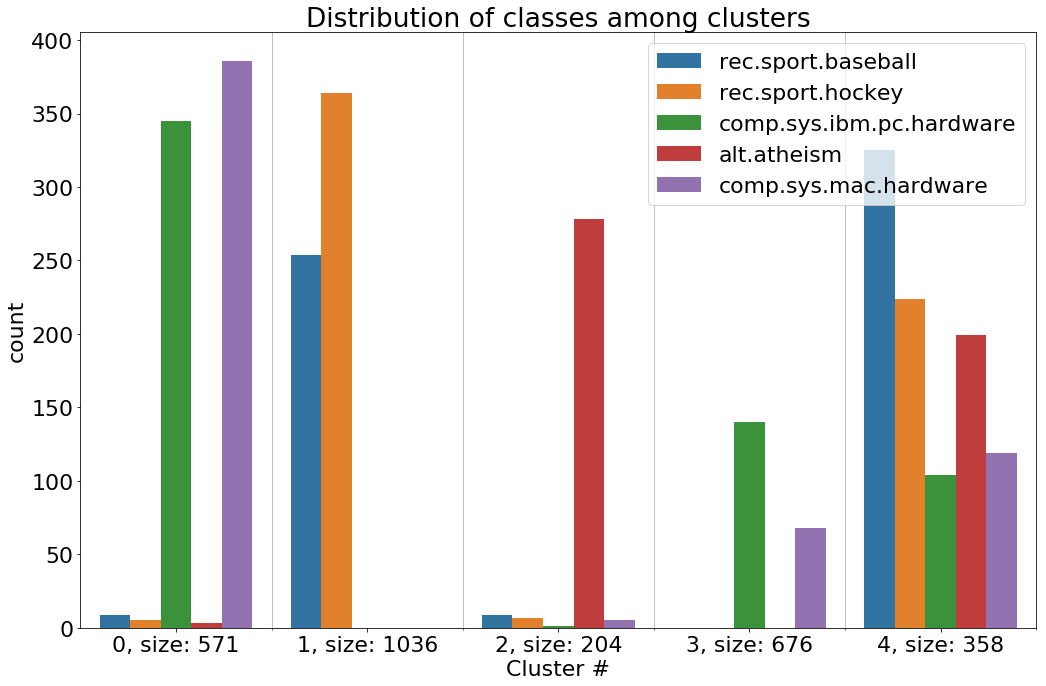

In [14]:
max_i = ARIs.index(max(ARIs)) # Get the index of the highest ARI
n = int(n_range[max_i]) # Get the number of components that led to the highest ARI

# Fit a K-means object
pca = PCA(n_components=n, random_state=1000)
X_ = pca.fit_transform(X)
km = KMeans(n_clusters=5, random_state=1000)
km.fit(X_)

# Plot a bar chart
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
sns.countplot(km.labels_, hue=y)
plt.xlabel('Cluster #')
plt.title('Distribution of classes among clusters')

plt.gca().set_xticks([i + 0.5 for i in range(5)], minor=True)
plt.gca().set_xticklabels(xticklabels)
plt.grid(True, which='minor')

plt.tight_layout()
plt.show()

<div align="right"><font color="blue" size="4">4.0</font></div>

f)

As observed from the slight increase in ARI, the graph indicates that we are achieving a slightly better performance than before. The purity of most of the clusters seems to have improved slightly in the sense that we see a less equal spread of the classes between the clusters. This is especially evident in cluster 4 which corresponded before to the cluster which had a roughly equal number of all classes. In cluster 3 (which corresponds to cluster 2 before) we see a slightly better distinction between comp.sys.ibm.pc.hardware and comp.sys.mac.hardware. It also seems that the distinction between rec.sport.baseball and rec.sport.hockey in cluster 1 is slightly better. It does however seem that the distinction between comp.sys.ibm.pc.hardware and comp.sys.mac.hardware in cluster 0 has not improved much.

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.6 --- [16 marks] ==========

Another benefit of Dimensionality Reduction is that it allows us to visualise the data. That is, while we cannot visualise a 1000-feature space, we can pick the top two components and visualise those. We will do this by means of a [Voronoi Diagram](https://en.wikipedia.org/wiki/Voronoi_diagram), which we will use to analyse the cluster centres.

&nbsp;&nbsp;**(a)** [Text] By explaining what a Voronoi Diagram is, indicate why it is useful in visualising the extent (in space) of K-Means clusters?<br>
&nbsp;&nbsp;**(b)** [Code] Using the function `plot_voronoi` which we provided in the `utils` package, visualise the clusters in the two-dimensional PCA space (top two components). Mark each cluster centre, and visualise **some** (*Hint: sub-sample*) of the data points to give you an idea of where the true classes lie. Make sure that the key elements of the plot are clearly visible/discernible (you may need to tweak some parameters) and label clearly all necessary elements of the plot (color-coding, data points). *Tip: you may need to change y to a numeric value if using matplotlib rather than seaborn*.<br>
&nbsp;&nbsp;**(c)** [Text] What can you conclude from the plot as to the "classification-performance" of the K-Means classifier?

<div align="right"><font color="blue" size="4">12.5/16.0</font></div>

a)

A Voronoi diagram is a partition of a plane into a given number of regions based on the Euclidean distance to a set number of points. For each of these points there is a corresponding region consisting of all points closer to it than any other. This is similar to K-means clustering in the sense that K-means also clusters a set of points (instances) based on some distance measure (usually also the Euclidean distance). Therefore by plotting a Voronoi diagram using the cluster means we obtain from a particular clustering, we can visualise the partition of our input space into the classes as created by our K-means algorithm.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">A voronoi diagram shows the partioning of a plane into regions based on some distance metric, like Euclidean</font></div>

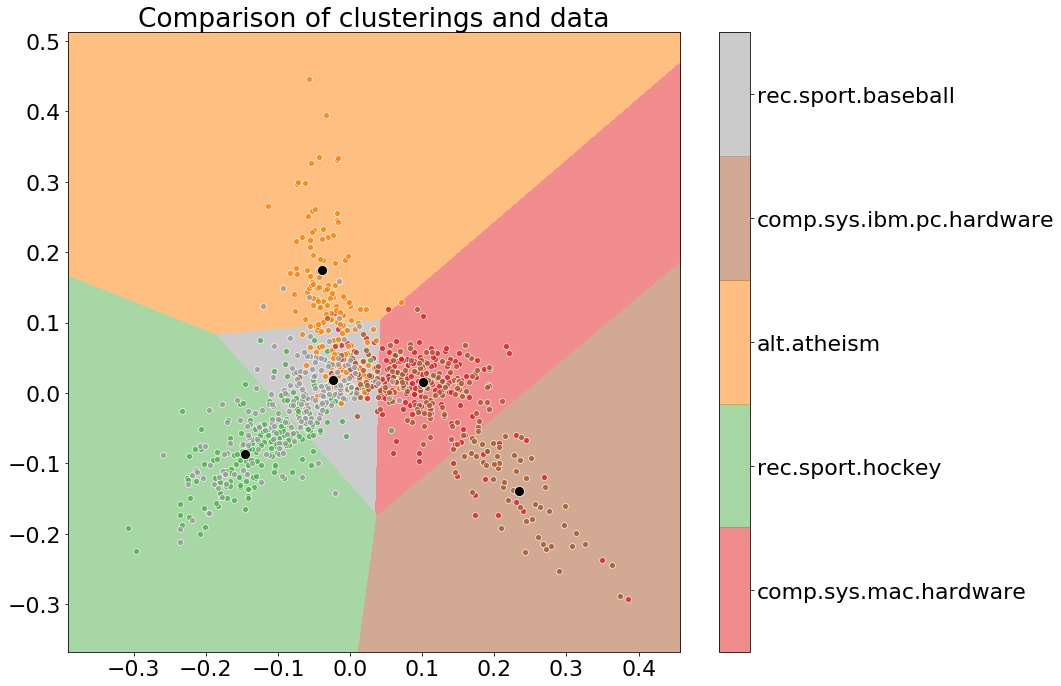

In [17]:
X_Min, X_Max = X_[:,0].min()-0.05, X_[:,0].max()+0.05
Y_Min, Y_Max = X_[:,1].min()-0.05, X_[:,1].max()+0.05
XY_range = [X_Min, X_Max, Y_Min, Y_Max]
random_sample = np.random.choice(X_.shape[0], 1000, replace=False)
X_sample, y_sample = X_[random_sample, :], y[random_sample]

plt.figure(figsize=(15,10))

plot_voronoi(km, XY_range, X_.shape[0])

cb = plt.colorbar()
# Classes ordered based on the clusterings and 
# looking at the majority class in each cluster
classes = ['comp.sys.mac.hardware','rec.sport.hockey','alt.atheism','comp.sys.ibm.pc.hardware','rec.sport.baseball']
cb.ax.set_yticklabels(classes) 

# Plotting a subset of the points
cmap = plt.get_cmap('Set1', 5).colors
for colour, i in zip(cmap, classes):
    sns.scatterplot(X_sample[y_sample==i,0], X_sample[y_sample==i,1], color=colour, alpha=0.8)

# Plotting the cluster centers
sns.scatterplot(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, color="black")

plt.title('Comparison of clusterings and data')
plt.tight_layout()
plt.show()

<div align="right"><font color="blue" size="4">8.0</font></div>

<div align="left"><font color="green" size="4">Did not do stratified sampling
	Did not add a legend indicating true label of each point
	Did not label x/y axis correctly</font></div>

c)

We can see from the plot that the clustering algorithm struggles to discern between two pairs of classes: comp.sys.mac.hardware/comp.sys.ibm.pc.hardware and rec.sport.baseball/rec.sport.hockey. This is evident because we can see many misclassified instances in the plot. The algorithm seems to have been able to capture the alt.atheism class relatively well, we see few instances of other classes within its region and most of the orange data points are within the correct region.

When looking at the distribution of the actual instances we see clearly why the algorithm struggled. The green and grey (hockey and baseball) points are all mixed together as are the red and brown (mac and ibm) points. Even looking at the data it would be difficult to draw regions which split the points well.

<div align="right"><font color="blue" size="4">2.5</font></div>

<div align="left"><font color="green" size="4">Did not comment on the fact that PCA preserves a lot information in this case even with	two components</font></div>